In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [11]:
states = pd.read_csv('ClusterData.csv')

In [12]:
states.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


In [9]:
states.columns

Index(['State', 'state_code', 'data science', 'cluster analysis', 'college',
       'startup', 'entrepreneur', 'ceo', 'mortgage', 'nba', 'nfl', 'mlb',
       'fifa', 'modern dance', 'prius', 'escalade', 'subaru', 'jello', 'bbq',
       'royal family', 'obfuscation', 'unicorn', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'PsychRegions', 'region', 'division'],
      dtype='object')

In [10]:
list(states.columns)

['State',
 'state_code',
 'data science',
 'cluster analysis',
 'college',
 'startup',
 'entrepreneur',
 'ceo',
 'mortgage',
 'nba',
 'nfl',
 'mlb',
 'fifa',
 'modern dance',
 'prius',
 'escalade',
 'subaru',
 'jello',
 'bbq',
 'royal family',
 'obfuscation',
 'unicorn',
 'Extraversion',
 'Agreeableness',
 'Conscientiousness',
 'Neuroticism',
 'Openness',
 'PsychRegions',
 'region',
 'division']

## Save numerical data only

In [14]:
#skip the first two columns with text ("State" and "state_code")
st = states[states.columns[2:]]
st.index = states.ix[:,1]

In [17]:
st

,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,nfl,mlb,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
state_code,,,,,,,,,,,,,,,,,,,,,
AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,-1.83,-1.30,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,0.68,0.14,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,-1.59,-1.24,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,-0.91,0.39,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,1.17,-0.51,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8
CT,0.69,1.28,1.17,0.41,0.09,1.52,0.51,0.03,-0.64,1.25,...,0.47,0.09,57.6,38.6,34.2,53.4,53.9,3,1,1
DE,0.45,2.91,-0.46,0.14,2.74,0.91,1.71,0.37,1.63,0.86,...,0.11,-0.49,47.0,38.8,36.5,62.4,42.7,3,3,5
FL,-0.73,-1.38,-0.30,-0.75,0.78,0.36,0.03,1.43,-0.47,0.06,...,-0.88,-1.10,60.9,50.7,62.7,40.8,61.0,1,3,5
GA,-0.27,-0.57,0.25,-1.13,1.97,0.42,0.25,0.89,-0.53,-0.67,...,-0.71,-1.01,63.2,60.0,68.8,38.0,56.9,1,3,5


In [18]:
#determine which states are closest to eachother based on the different features
#here we create a linkage matrix and assign it to Z
Z = linkage(st, 'ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 13.237798155282473, 13.237798155282473, 0.0],
  [0.0, 6.6479996991576344, 6.6479996991576344, 0.0],
  [0.0, 10.571541987808592, 10.571541987808592, 0.0],
  [6.6479996991576344,
   16.128874728262964,
   16.128874728262964,
   10.571541987808592],
  [13.237798155282473,
   21.733979540495266,
   21.733979540495266,
   16.128874728262964],
  [0.0, 8.7937648365191148, 8.7937648365191148, 0.0],
  [0.0, 10.080615060600225, 10.080615060600225, 0.0],
  [0.0, 12.866281514097221, 12.866281514097221, 10.080615060600225],
  [8.7937648365191148,
   26.815707710220888,
   26.815707710220888,
   12.866281514097221],
  [21.733979540495266,
   33

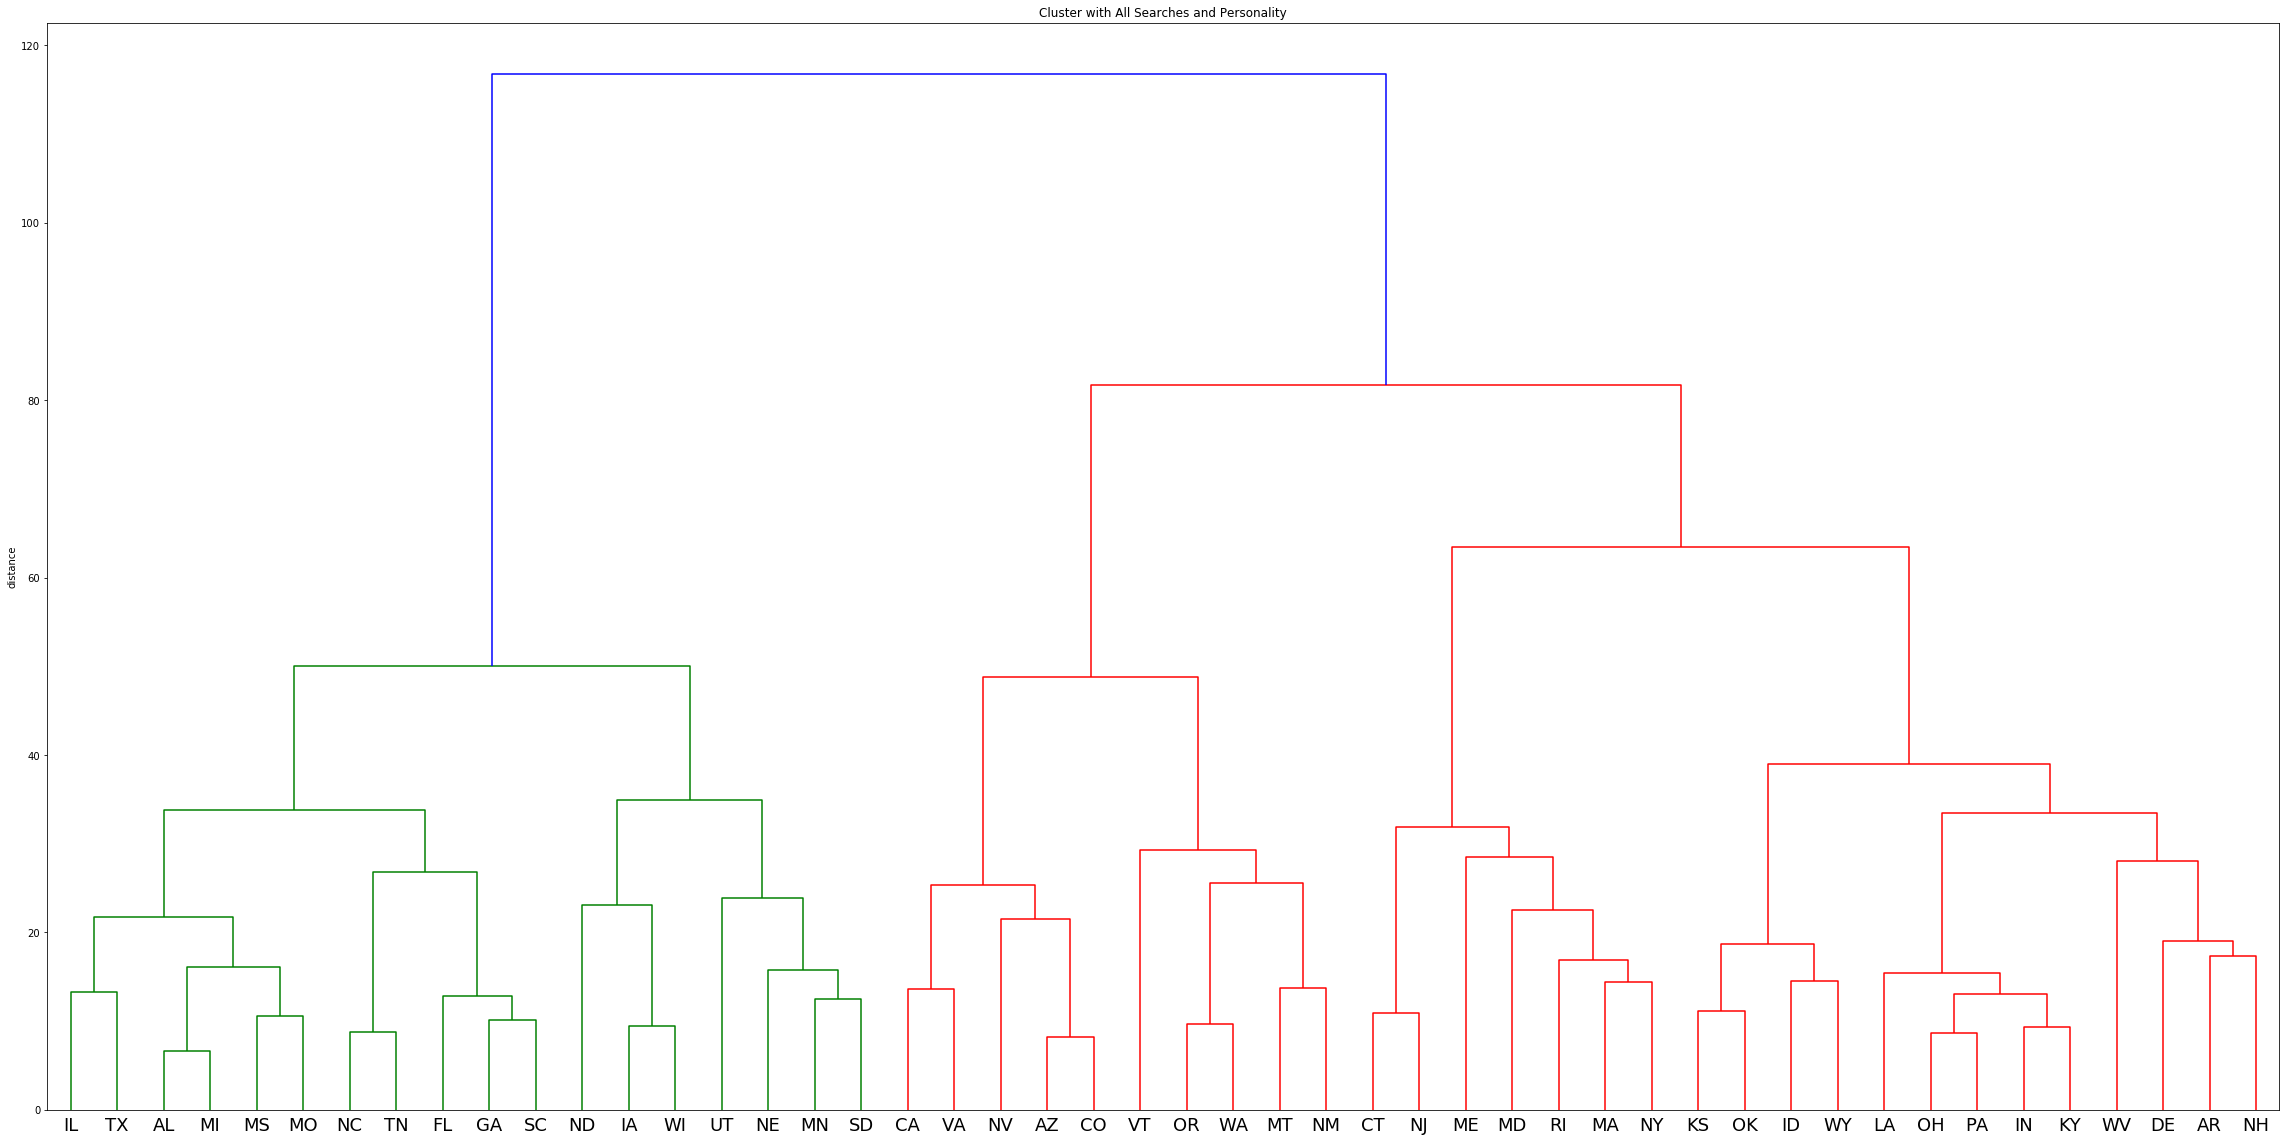

In [23]:
#here we plot the "Dendogram" which shows the breakdown of the Clusters of States in terms of similarity
#Utah is similar to Nebraska, Minnesota, and South Dakota... (great...)
plt.figure(figsize = (40,20))
plt.title('Cluster with All Searches and Personality')
plt.ylabel('distance')
dendrogram(Z, labels = st.index, leaf_rotation = 0., leaf_font_size = 18.,)